In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataset.shape

(768, 9)

In [4]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


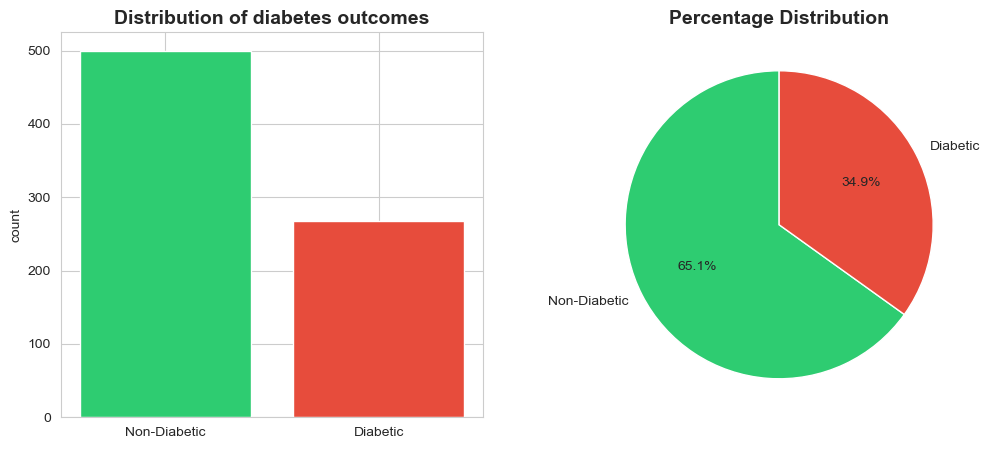

In [8]:
plt.figure(figsize=(12, 5))

# Bar plot
plt.subplot(1, 2, 1)
outcome_counts = diabetes_dataset['Outcome'].value_counts()
plt.bar(['Non-Diabetic', 'Diabetic'], outcome_counts.values, color=['#2ecc71','#e74c3c'])
plt.title('Distribution of diabetes outcomes', fontsize=14, fontweight='bold')
plt.ylabel('count')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(outcome_counts.values, labels=['Non-Diabetic', 'Diabetic'],
        autopct='%1.1f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
plt.title('Percentage Distribution', fontsize=14, fontweight='bold')

plt.show()


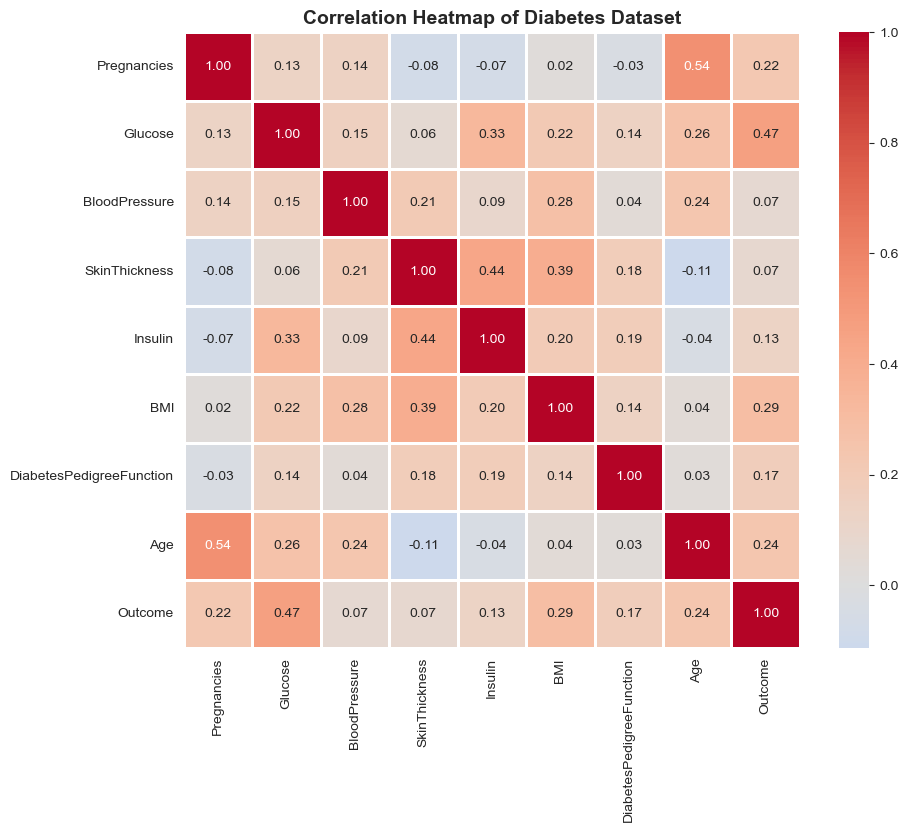

In [10]:
plt.figure(figsize=(10, 8))
correlation = diabetes_dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, square= True, linewidth=1,fmt='.2f')
plt.title('Correlation Heatmap of Diabetes Dataset', fontsize=14, fontweight='bold')
plt.show()

feature distribution

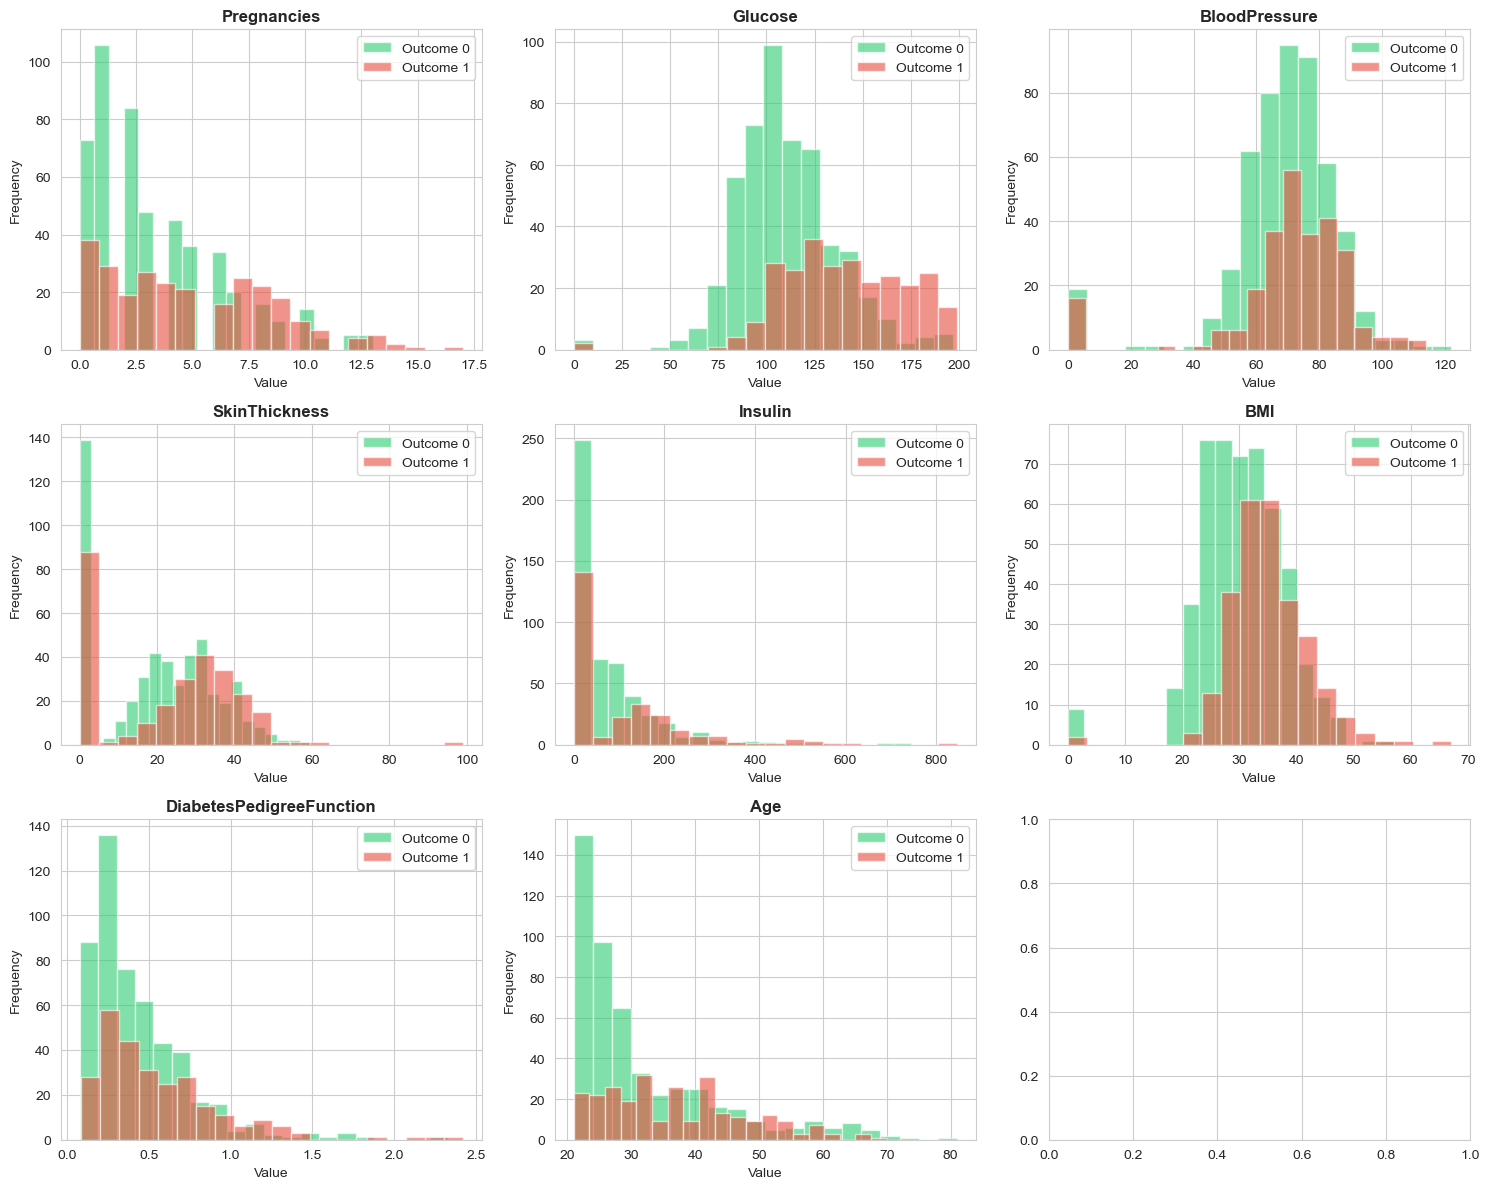

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = diabetes_dataset.columns[:-1]  # exclude Outcome

for idx, feature in enumerate(features):
    row, col = idx // 3, idx % 3
    for outcome in [0, 1]:
        data = diabetes_dataset[diabetes_dataset['Outcome'] == outcome][feature]
        axes[row, col].hist(data, alpha=0.6, bins=20, 
                            label=f'Outcome {outcome}', 
                            color=['#2ecc71', '#e74c3c'][outcome])
    axes[row, col].set_title(feature, fontweight='bold')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

Data preprocessing

In [14]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
y = diabetes_dataset['Outcome']

print(X)
print(y)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [16]:
# 2. Initialize StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Support Vector Machine (SVM)

In [18]:
classifier = svm.SVC(kernel='linear',probability=True)
classifier.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
training_data_accuracy

0.7866449511400652

In [20]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
test_data_accuracy

0.7727272727272727

In [21]:
precision = precision_score(y_test, X_test_prediction)
recall = recall_score(y_test, X_test_prediction)
f1 = f1_score(y_test, X_test_prediction)
print(precision,recall,f1)

0.7567567567567568 0.5185185185185185 0.6153846153846154


In [22]:
cm_svm = confusion_matrix(y_test, X_test_prediction)
cm_svm

array([[91,  9],
       [26, 28]])

In [33]:
rf_classfier = RandomForestClassifier(n_estimators=100,random_state=2)
rf_classfier.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
X_train_prediction_rf = rf_classfier.predict(X_train)

In [39]:
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf,y_train)
training_data_accuracy_rf

1.0

In [40]:
X_test_prediction_rf = rf_classfier.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf,y_test)

In [41]:
test_data_accuracy_rf

0.7272727272727273

In [42]:
recall_rf = recall_score(y_test, X_test_prediction_rf)

In [43]:
f1_rf = f1_score(y_test, X_test_prediction_rf)

In [45]:
print(precision,recall_rf,f1_rf)

0.7567567567567568 0.48148148148148145 0.5531914893617021


In [47]:
cm_rf = confusion_matrix(y_test,X_test_prediction_rf)
print(cm_rf)

[[86 14]
 [28 26]]


In [48]:
print('SVM',test_data_accuracy)
print('Random Forest',test_data_accuracy_rf)

SVM 0.7727272727272727
Random Forest 0.7272727272727273


In [49]:
 joblib.dump(classifier,'diabetes_model.pkl')

['diabetes_model.pkl']

In [50]:
input_data = (5,166,72,19,175,25.8,0.587,51)
input_num_array =np.asarray(input_data)
reshape = input_num_array.reshape(1,-1)

std_data = scaler.transform(reshape)
prediction = classifier.predict(std_data)

In [51]:
prediction


array([1])

In [53]:
from sklearn.ensemble import RandomForestClassifier
import joblib

# Example: train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Save model
joblib.dump(rf_model, 'diabetes_model.pkl')


['diabetes_model.pkl']